In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 

In [3]:
df=pd.read_csv('Titanic-Train.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


### 1. Survival Rate Disparity
Is there a significant difference in survival between different passenger classes (1st, 2nd, 3rd class)? If so, by how much?

In [17]:
df.groupby('Pclass').size()


Pclass
1    216
2    184
3    491
dtype: int64

In [18]:
df[df['Survived'] == 1].groupby('Pclass').size()

Pclass
1    136
2     87
3    119
dtype: int64

In [6]:
firstClassSurvival=len(df[(df['Pclass']==1) & (df['Survived']==1)]) 
secondClassSurvival=len(df[(df['Pclass']==2) & (df['Survived']==1)])
thirdClassSurvival=len(df[(df['Pclass']==3) & (df['Survived']==1)])
print(firstClassSurvival)
print(secondClassSurvival)
print(thirdClassSurvival)

136
87
119


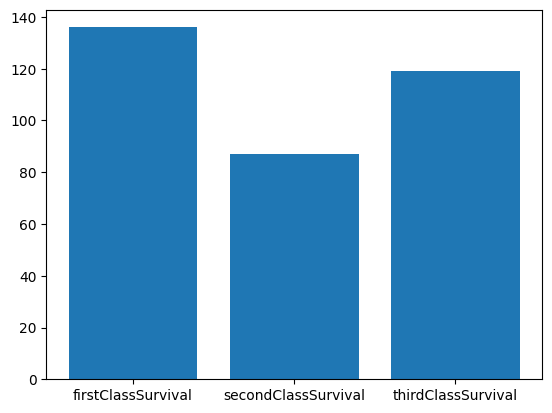

In [7]:
plt.bar(np.array(['firstClassSurvival','secondClassSurvival','thirdClassSurvival']),np.array([firstClassSurvival,secondClassSurvival,thirdClassSurvival]))
plt.show()

### 2. Age and Survival Probability
How does age affect survival probability? Is there a specific age group that had the highest survival rate?

In [30]:
child=len(df[(df['Age']<=13)  & (df['Survived']==1)])
totalchild=len(df[(df['Age']<=13)])

teenage=len(df[(df['Age']>13) &(df['Age']<=18) & (df['Survived']==1)])
totalteenage=len(df[(df['Age']>13) &(df['Age']<=18)])

adult=len(df[(df['Age']>18) & (df['Age']<50) & (df['Survived']==1)])
totaladult=len(df[(df['Age']>18) & (df['Age']<50)])

old=len(df[(df['Age']>=50)  & (df['Survived']==1)])
totalold=len(df[(df['Age']>=50)])

print('childeren survived=',child,'total children=',totalchild,'survival probablity=',child/totalchild)
print('teenagers survived=',teenage,'total children=',totalteenage,'survival probablity=',teenage/totalteenage)
print('adults survived=',adult,'total adults=',totaladult,'survival probablity=',adult/totaladult)
print('old peoples survived=',child,'total old peoples=',totalold,'survival probablity=',old/totalold)

childeren survived= 42 total children= 71 survival probablity= 0.5915492957746479
teenagers survived= 28 total children= 68 survival probablity= 0.4117647058823529
adults survived= 193 total adults= 501 survival probablity= 0.3852295409181637
old peoples survived= 42 total old peoples= 74 survival probablity= 0.36486486486486486


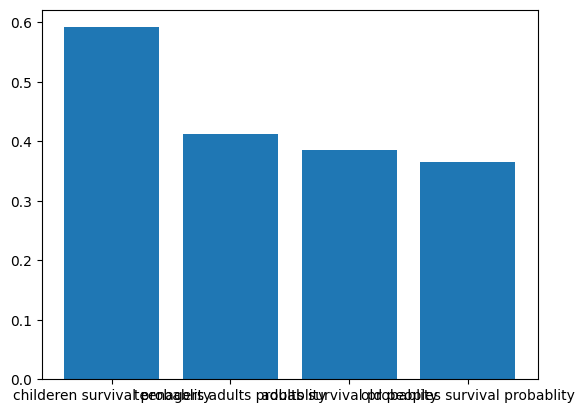

In [32]:
fig, ax = plt.subplots()
ax.bar(np.array(['childeren survival probablity','teenagers adults probablity','adults survival probablity','old peoples survival probablity']),np.array([child/totalchild,teenage/totalteenage,adult/totaladult,old/totalold]))
plt.show()

### 3. Family Size Impact
Does the size of a passenger's family (siblings/spouses and parents/children) onboard affect their likelihood of survival? What trends can you observe?

##### Parch vs Survival

In [46]:
Parch_survivors=df[df['Survived']==1].groupby('Parch').size()
Parch_counts=df.groupby('Parch').size()

In [53]:
Parch_survivors[4]=0
Parch_survivors[6]=0
Parch_survivors

Parch
0    233
1     65
2     40
3      3
5      1
4      0
6      0
dtype: int64

In [48]:
Parch_counts

Parch
0    678
1    118
2     80
3      5
4      4
5      5
6      1
dtype: int64

In [56]:
Parch_survivors_rate=Parch_survivors/Parch_counts

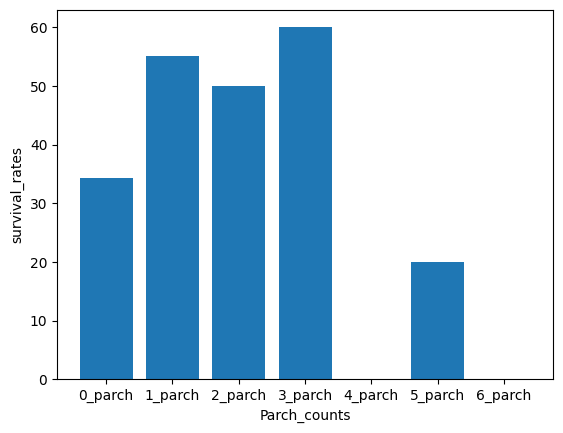

In [59]:
plt.bar(np.array(['0_parch','1_parch','2_parch','3_parch','4_parch','5_parch','6_parch']),Parch_survivors_rate*100)
plt.xlabel('Parch_counts')
plt.ylabel('survival_rates')
plt.show()

#### SibSp vs Survival

In [68]:
sibp_count=df.groupby('SibSp').size()

In [64]:
sibp_survived=df[df['Survived']==1].groupby('SibSp').size()
sibp_survived[5]=0
sibp_survived[8]=0

In [66]:
sibp_survival_rate=sibp_survived/sibp_count

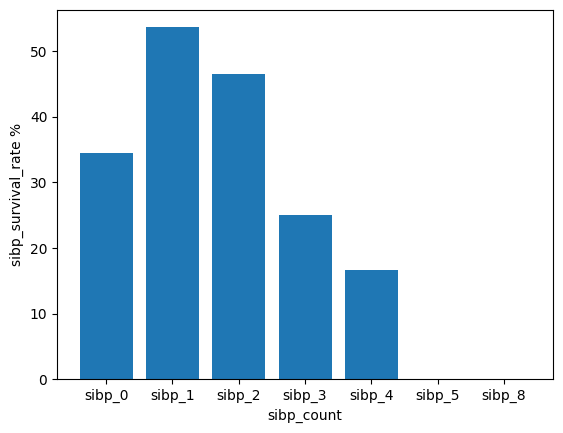

In [73]:
plt.bar(np.array(['sibp_0','sibp_1','sibp_2','sibp_3','sibp_4','sibp_5','sibp_8']),sibp_survival_rate*100)
plt.ylabel('sibp_survival_rate %')
plt.xlabel("sibp_count")
plt.show()

### 4. Sex and Class Interaction
How does the interaction between sex and passenger class affect survival rates? For instance, was being a woman in 1st class more advantageous than being a man in 2nd class?

#### sex & class vs survival

In [74]:
df['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

In [76]:
df['Pclass'].value_counts()

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

### 5. Missing Values Imputation
Many records have missing values (like Age). What’s the best strategy to impute missing values for age, and how does the choice of imputation technique affect the analysis?

### 6. Ticket Fare Analysis
Are higher ticket fares associated with higher survival rates? How does the fare distribution vary across passenger classes and survival outcomes?

### 7. Embarkation Port Impact
Did the port of embarkation (Cherbourg, Queenstown, Southampton) have any significant impact on survival rates? Can you infer possible reasons for any differences?

### 8. Child vs. Adult Survival
What was the survival rate among children (age ≤ 12) compared to adults? Did children of certain classes have better chances of survival?

### 9. Predicting Survival with a Machine Learning Model
Build a logistic regression or decision tree model to predict survival. What are the most important features contributing to the survival prediction?

### 10. Group Survival Analysis
Were groups (families or people with the same ticket number) more likely to survive together? Analyze whether survival of individuals in a group depended on others in the group.

### 11. Correlation Between Fare and Class
Perform a correlation analysis between the fare and class. Is there any correlation between ticket price and class? How do the outliers (extremely high or low fares) affect this?

### 12. Predicting Missing Ages Using a Regression Model
Use a regression model (e.g., linear regression or random forest) to predict missing ages based on other features like passenger class, fare, and embarkation point. How accurate is the model?

### 13. Cabin Data Exploration
Can the available Cabin information be used to predict survival or enhance other variables like class or fare? How would you handle the missing cabin data?

### 14. Lifeboat Prioritization Hypothesis
Is there evidence to support the hypothesis that certain groups (e.g., women, children, and 1st class passengers) were prioritized for lifeboat allocation? Use statistical tests to verify this.

### 15. Feature Engineering: Create New Features
Engineer new features such as "Travel Alone" (whether a passenger was traveling alone or with family) or "Deck" (derived from the cabin data). How do these new features improve predictive power in survival analysis?